### Keras Perceptron 

In [1]:
import pandas as pd

data = {
    "x1": [0,1,0,1],
    "x2": [0,0,1,1],
    "y":  [1,1,1,0]
}

df_data = pd.DataFrame(data).astype('int')
df_data

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [2]:
# Convert data into numpy arrays
X = df_data[["x1", "x2"]].values
y = df_data[["y"]].values

In [7]:
# Stand up a perceptron using Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a NN model that will be constructed in terms of layers
model = Sequential()
# Add a layer that has 2 outputs and accepts 2 inputs with a sigmoid activation function
model.add(Dense(2, input_dim=2, activation='sigmoid'))
# Add a layer that has 1 output with a sigmoid activation function
model.add(Dense(1, activation='sigmoid'))
# Configure (compile) the model for training using the 'adam' optimizer (to optimize the gradient movement)
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
# Train the model using N epochs
model.fit(X, y, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 1ms/step - loss: 0.2320 - accuracy: 0.7500
Epoch 2/20
1/1 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.7500
Epoch 3/20
1/1 [==============================] - 0s 1ms/step - loss: 0.2315 - accuracy: 0.7500
Epoch 4/20
1/1 [==============================] - 0s 3ms/step - loss: 0.2313 - accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.7500
Epoch 6/20
1/1 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.7500
Epoch 8/20
1/1 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.7500
Epoch 9/20
1/1 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.7500
Epoch 10/20
1/1 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.7500
Epoch 11/20
1/1 [======================

In [8]:
# Print out the model characteristics
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Evaluate the model and generate the configured model metrics
scores = model.evaluate(X, y)

print(f'\n{model.metrics_names[1]} is: {scores[1]*100}') 

1/1 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.7500

accuracy is: 75.0


### Another Example

1. Load Data
1. Define Model
1. Compile Model
1. Fit Model
1. Evaluate Model

In [25]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

#### LOAD DATA

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
y_train[0]

5

In [28]:
# Transform X values (0 => 255) to (0..1)
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32')  / 255.0

# X_train[3] (uncomment to verify the action above)

In [29]:
# Transform output data ("class" 0 to 9) to an array of categorical data ('0' or '1')
print(f'Output is one of 10 classes: {y_train[2]}')

# Transformation will enable us to the use the softmax activation function
# Softmax takes a vector and translates each value between 0 and 1 in which all the values
#   sum up to 1 (we can treat it like probability)

Output is one of 10 classes: 4


In [30]:
num_classes = 10 # number of classes we have is 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)
print(f'Output is one of 10 classes: {y_train[2]}')

Output is one of 10 classes: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#### DEFINE MODEL

In [31]:
np.random.seed(42)

In [32]:
model = Sequential()

In [33]:
from tensorflow.keras.layers import Flatten

model.add(Flatten(input_shape=(28, 28)))   # flatten the input into a single array
model.add(Dense(10, activation="softmax")) # add a layer with 20 outputs using the softmax activation function

In [34]:
# Configure the model for training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Fit/train the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4693 - accuracy: 0.8774
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9149: 0s -
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2829 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9241
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9254
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2620 - accuracy: 0.9273: 0s - loss: 0.2592  - ETA: 0s - loss: 0.261
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9283
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2554 - accuracy: 0.9294: 0s - loss: 0.2543 - accu
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2532 - accuracy: 0.9301
Epoch 

In [37]:
model.fit(X_train, y_train,
         epochs=3,
         validation_data=(X_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2491 - accuracy: 0.9319 - val_loss: 0.2652 - val_accuracy: 0.9265
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2473 - accuracy: 0.9313 - val_loss: 0.2698 - val_accuracy: 0.9250
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2460 - accuracy: 0.9319 - val_loss: 0.2691 - val_accuracy: 0.9254


#### EVALUATE THE MODEL

In [39]:
# Get evaluation scores
scores = model.evaluate(X_test, y_test)
print("Validation Data Metrics")
print(f'{model.metrics_names[0]}: {scores[0]}')
print(f'{model.metrics_names[1]}: {scores[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2691 - accuracy: 0.9254
Validation Data Metrics
loss: 0.26907652616500854
accuracy: 0.9254000186920166


In [40]:
# Generate a prediction for a particular input "row"
model.predict(np.array([X_test[1]])) # result: predicting a '2'

array([[1.6780356e-04, 1.3679999e-06, 9.8967594e-01, 2.6424786e-05,
        1.6399618e-15, 4.5913048e-03, 5.5108690e-03, 3.9282953e-20,
        2.6305906e-05, 1.5476161e-16]], dtype=float32)

In [41]:
y_test[1] # actual target data is a '2'

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

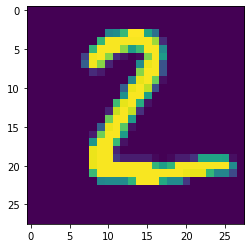

In [43]:
import matplotlib.pyplot as plt

plt.imshow(X_test[1]) # display the actual data image